# Linear Regeression

Weight/Height analizing

## Analizing and plotting data

SOCR data. 25000 teenagers

In [182]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [183]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

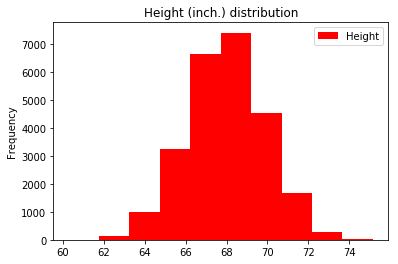

In [184]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

In [185]:
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


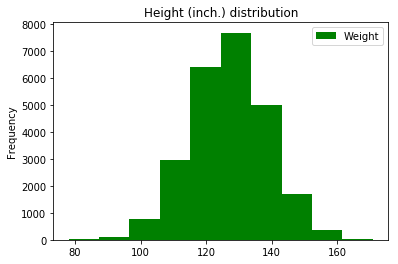

In [186]:
data.plot(y='Weight', kind='hist', 
           color='green',  title='Height (inch.) distribution')

In [187]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [188]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

Pairplot representation of Weight, Height, BMI

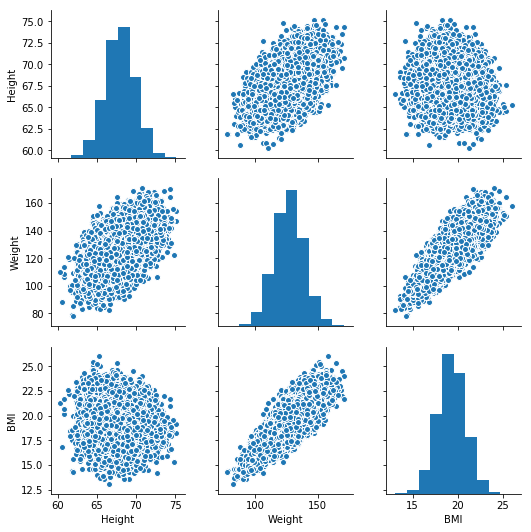

In [189]:
sns.pairplot(data)

New attribute for DataFrame: weight_category: 1 – if less than 120 pounds, 3 - if more than 150 pounds , 2 – other.

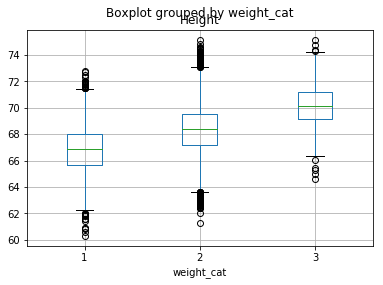

In [190]:
def weight_category(weight):
    pass
    if weight < 120:
        return 1
    if weight > 150:
        return 3
    else:
        return 2

data['weight_cat'] = data['Weight'].apply(weight_category)
data.boxplot(by = 'weight_cat', column = ['Height'])



**[5].** Постройте scatter plot зависимости роста от веса, используя метод *plot* для Pandas DataFrame с аргументом *kind='scatter'*. Подпишите картинку.

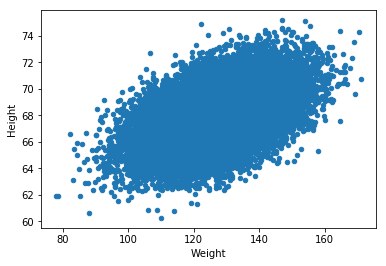

In [191]:
data.plot(y = 'Height', x = 'Weight', kind = 'scatter')

## Linear regression and MSE(minimal square error)



 $y = w_0 + w_1 * x$:
 
$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $


In [192]:
def error(w0, w1, x, y):
    summ = 0
    for i in range(x.size):
        summ += (y[i] - (w0 + w1*x[i]))**2
    return summ    

1338.0663265306125
[ 70.          72.24489796  74.48979592  76.73469388  78.97959184
  81.2244898   83.46938776  85.71428571  87.95918367  90.20408163
  92.44897959  94.69387755  96.93877551  99.18367347 101.42857143
 103.67346939 105.91836735 108.16326531 110.40816327 112.65306122
 114.89795918 117.14285714 119.3877551  121.63265306 123.87755102
 126.12244898 128.36734694 130.6122449  132.85714286 135.10204082
 137.34693878 139.59183673 141.83673469 144.08163265 146.32653061
 148.57142857 150.81632653 153.06122449 155.30612245 157.55102041
 159.79591837 162.04081633 164.28571429 166.53061224 168.7755102
 171.02040816 173.26530612 175.51020408 177.75510204 180.        ]


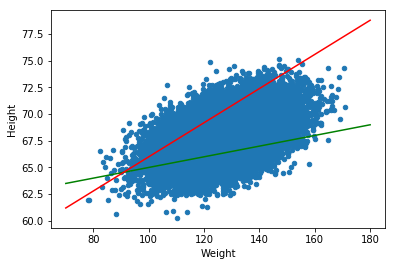

In [193]:
x = np.linspace(70, 180, 50)
def y (x, w0, w1):
    return w0 + w1*x
y1 = y(x, 60, 0.05)
y2 = y(x, 50, 0.16)
data.plot(y = 'Height', x = 'Weight', kind = 'scatter')
plt.plot(x, y1, color = 'green')
plt.plot(x, y2, color = 'red')
print error(50, 0.16, x, y1)
print x

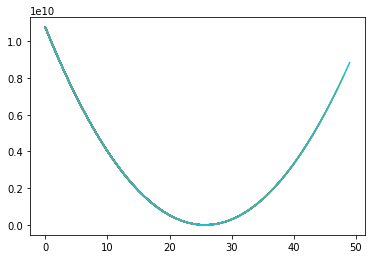

In [205]:
error_val = []
y = data['Height'].values
x = data['Weight'].values
for w1 in np.arange(-5.0, 5.0, 0.2):
    error_val.append(error(50, w1, x, y))
    plt.plot(error_val)


In [214]:
from scipy.optimize import minimize_scalar
w0 = 50
w1_opt = minimize_scalar(error, args = (w0, data['Height'].values, data['Weight'].values ), bounds = (-5, 5))
w1_opt = min(error_val)


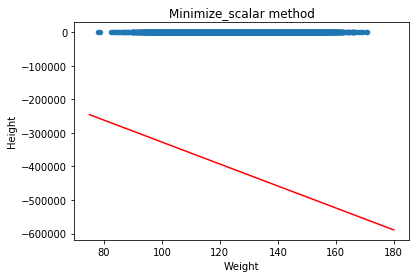

In [213]:
def y(x):
    w0 = 50
    return w0 + w1_opt.x * x
    
x = np.linspace(75, 180)
data.plot(x='Weight', y='Height', kind='scatter', title='Minimize_scalar method')
plt.plot(x, y(x),color='red');

In [197]:
from mpl_toolkits.mplot3d import Axes3D

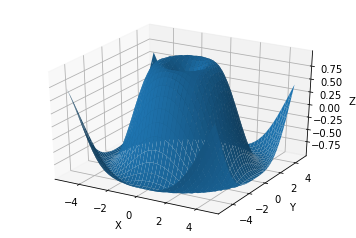

In [198]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))


surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()